



# Invistigating Factors Affecting Prediction of Patients No-shows incidences in Brazil

By Osama Mohamed Naguib


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

* In this Analysis, we are going to exlpore the factors affecting the prediction if a patient would show up in his/her scheduled medical apointments or not.

* Dataset is composed of over 110k entries representing Patients appointments details in Brazil; emphasizing No_Shows incidences and some other independent variables/Factors that should be invistigated in this study, to know wheather it has a correlation with the dependent variable "No_show" or not.

* Variables includes: 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension','Diabetes', 'Alcoholism', 'Handicapped', 'SMS_received', 'No-show'.

* A Correlation analysis will be carried out between No-shows incidences and other independent variables; trying to address the real employed factors that could empower the concerned parties in planning and execution of medical appotintments; maximizing the overall outcomes.

### Research Questions:

#### Q1: Is there a correlation between No-Shows incidences  and receiveing SMS message?
#### Q 2:  Is there is a correlation between No-shows incidences and Age groups?

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, after loading in the data, we will check for cleanliness, and then trim and clean our dataset for analysis.

#### Data Assessment includes: `Visual Assessment` and `Programatic Assessment`.


##### $\color{Grey}{\text{Visual Assessment}}$:

* View of df
* Head
* Tail
* Sample
* df.columns
* df[:1]

##### $\color{Grey}{\text{Programatic Assessment}}$:

* info
* shape
* describe
* Duplicated()
* mean()
* value_counts()
* isnull().sum()
* unique()
* nunique()



##### $\color{orange}{\text{Loading the dataset}}$

In [4]:
# Loading dataset into dataframe
df = pd.read_csv(
    r'C:\Users\osama.naguib\OneDrive\Udacity Projects\Advanced Track\Project 1 - Invistigate a Dataset\Dataset\DS_NO_SHOW.csv')
# Exploring dataframe
df.shape


(110527, 14)

### $\color{orange}{\text{Visual Assessment}}$

In [3]:
# Checking the first rows of df
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


ScheduledDay  and AppointmentDay is not in dateTime format, and should be corrected

Patients ID and Appointments ID are not needed in the analysis, and will be dropped after ensuring that no duplicates are there

In [4]:
# Checking the last rows of df
df.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [5]:
# Insoecting a random sample of df
df.sample(15)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
5070,1.513990e+11,5708703,F,2016-05-17T11:48:20Z,2016-05-19T00:00:00Z,17,SANTA LUÍZA,0,0,0,0,0,0,No
80643,7.877169e+12,5661619,M,2016-05-05T07:39:10Z,2016-05-05T00:00:00Z,12,ITARARÉ,1,0,0,0,1,0,No
16924,8.382848e+11,5674766,F,2016-05-09T11:52:43Z,2016-05-16T00:00:00Z,36,RESISTÊNCIA,1,0,0,0,0,0,Yes
8810,3.353478e+13,5732779,M,2016-05-24T12:26:00Z,2016-05-24T00:00:00Z,44,DA PENHA,0,0,0,1,0,0,No
19858,4.769293e+11,5633371,M,2016-04-28T09:22:56Z,2016-05-24T00:00:00Z,43,BELA VISTA,0,0,0,0,0,1,No
61378,4.819263e+14,5704905,F,2016-05-16T16:59:07Z,2016-05-18T00:00:00Z,18,SÃO BENEDITO,0,0,0,0,0,0,Yes
62490,9.339426e+13,5684721,F,2016-05-11T09:01:43Z,2016-05-11T00:00:00Z,68,VILA RUBIM,0,0,0,0,0,0,No
50419,5.513255e+10,5596381,F,2016-04-18T14:30:19Z,2016-05-02T00:00:00Z,19,SANTO ANTÔNIO,1,0,0,0,0,1,Yes
58229,4.465542e+12,5675370,M,2016-05-09T13:38:12Z,2016-05-09T00:00:00Z,42,SANTA TEREZA,0,0,0,0,0,0,No
3796,3.438729e+12,5492968,M,2016-03-21T08:07:37Z,2016-05-04T00:00:00Z,4,RESISTÊNCIA,0,0,0,0,0,1,No


In [6]:
# Checking df headers naming issues
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

Some Columns has bad nameing; misspelled such as `'Hipertension'`, not conforming to documnetaiton rules (-) such as `'No-show'`; and not descriptive enough such as `'Handcap'`

In [7]:
# Checking df headers and first row data
df[:1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


### $\color{orange}{\text{Programatic Assessment}}$

In [8]:
# Exploration of df general information and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


* ScheduledDay and AppointmentDay is in object format, although it should be in datetime format.

* Despite No-show values are dichotomous in nature, since a patient has just 2 states; Attended `'Yes'` or missed `'No'` his medical appointment, so it will be converted into 0 and 1, and convert datatype into int; for easier calculations and ploting visualization.

In [9]:
# Addressing general description of df
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [10]:
# Addressing general description of df
df.shape

(110527, 14)

In [11]:
# CHecking for Duplicates records in Patinet ID and Appointment ID columns
df[['PatientId', 'AppointmentID']].duplicated().sum()

0

No duplicate records are found, so we can now remove these 2 IDs columns

In [12]:
# Finding duplicates 
df.duplicated().sum()

0

No duplicates were found

In [13]:
# Finding null records
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

No missing values

In [14]:
# Checking datatypes for date columns
df[['ScheduledDay' , 'AppointmentDay']].head(5)

,ScheduledDay,AppointmentDay
0,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z
1,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z
2,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z
3,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z
4,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z


ScheduledDay  and AppointmentDay is not in dateTime format, and should be corrected

In [15]:
# Checking Age categories
df.Age.value_counts().sort_values(ascending= False)

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
 56     1635
 38     1629
 59     1624
 2      1618
 50     1613
 57     1603
 36     1580
 51     1567
 19     1545
 39     1536
 37     1533
 54     1530
 34     1526
 33     1524
 30     1521
 6      1521
 3      1513
 17     1509
 32     1505
 5      1489
 44     1487
 18     1487
 58     1469
 46     1460
 45     1453
        ... 
 74      602
 76      571
 75      544
 78      541
 77      527
 80      511
 81      434
 82      392
 79      390
 84      311
 83      280
 85      275
 86      260
 87      184
 89      173
 88      126
 90      109
 92       86
 91       66
 93       53
 94       33
 95       24
 96       17
 97       11
 98        6
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

Age can't be -1, so this record will be removed

In [16]:
# Checking Handcap values
df.Handcap.value_counts().sort_values(ascending=False)

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

After some internet research, there are multiple Catigories for Hanicapped Patients from (1 to 4); All are representing a degree of disability(ies).

Since it is an exploratory study, and we dont know yet whether there is a correlation between Handicap in general and the no-shows incidences; so we will combine theses different degrees of handicap into one category and invistigate the correlation in general first.

In [17]:
# Checking Value counts for Scholarship
df.Scholarship.value_counts().sort_values(ascending=False)

0    99666
1    10861
Name: Scholarship, dtype: int64

In [18]:
# Checking Value counts for Hipertension
df.Hipertension.value_counts().sort_values(ascending=False)

0    88726
1    21801
Name: Hipertension, dtype: int64

In [19]:
# Checking Value counts for Diabetes
df.Diabetes.value_counts().sort_values(ascending=False)

0    102584
1      7943
Name: Diabetes, dtype: int64

In [20]:
# Checking Value counts for Alcoholism
df.Alcoholism.value_counts().sort_values(ascending=False)

0    107167
1      3360
Name: Alcoholism, dtype: int64

In [21]:
# Checking Value counts for No-show
df['No-show'].value_counts().sort_values(ascending=False)

No     88208
Yes    22319
Name: No-show, dtype: int64

No and Yes records will be converted into 1 and 0 to facilitate calculations and visualizations

In [22]:
# Checking for Neighbourhood values cleanliness and outliers
df.Neighbourhood.value_counts().describe()

count      81.000000
mean     1364.530864
std      1369.199539
min         1.000000
25%       413.000000
50%       851.000000
75%      2018.000000
max      7717.000000
Name: Neighbourhood, dtype: float64

In [23]:
# Checking for Neighbourhood values cleanliness and outliers
df.Neighbourhood.value_counts().median()

851.0

In [24]:
# Checking values naming in Neighbourhood
df.Neighbourhood.unique()

array(['JARDIM DA PENHA', 'MATA DA PRAIA', 'PONTAL DE CAMBURI',
       'REPÚBLICA', 'GOIABEIRAS', 'ANDORINHAS', 'CONQUISTA',
       'NOVA PALESTINA', 'DA PENHA', 'TABUAZEIRO', 'BENTO FERREIRA',
       'SÃO PEDRO', 'SANTA MARTHA', 'SÃO CRISTÓVÃO', 'MARUÍPE',
       'GRANDE VITÓRIA', 'SÃO BENEDITO', 'ILHA DAS CAIEIRAS',
       'SANTO ANDRÉ', 'SOLON BORGES', 'BONFIM', 'JARDIM CAMBURI',
       'MARIA ORTIZ', 'JABOUR', 'ANTÔNIO HONÓRIO', 'RESISTÊNCIA',
       'ILHA DE SANTA MARIA', 'JUCUTUQUARA', 'MONTE BELO',
       'MÁRIO CYPRESTE', 'SANTO ANTÔNIO', 'BELA VISTA', 'PRAIA DO SUÁ',
       'SANTA HELENA', 'ITARARÉ', 'INHANGUETÁ', 'UNIVERSITÁRIO',
       'SÃO JOSÉ', 'REDENÇÃO', 'SANTA CLARA', 'CENTRO', 'PARQUE MOSCOSO',
       'DO MOSCOSO', 'SANTOS DUMONT', 'CARATOÍRA', 'ARIOVALDO FAVALESSA',
       'ILHA DO FRADE', 'GURIGICA', 'JOANA D´ARC', 'CONSOLAÇÃO',
       'PRAIA DO CANTO', 'BOA VISTA', 'MORADA DE CAMBURI', 'SANTA LUÍZA',
       'SANTA LÚCIA', 'BARRO VERMELHO', 'ESTRELINHA', 'FORTE SÃO 

Neighbourhood entries naming seems to be ok with some outliers; shifting the mean upward

### $\color{orange}{\text{Summary of Observations "Cleaning Issues":}}$

* Bad Columns Names such as: {'Hipertension','Handcap','No-show'}
* Unnecessary columns such as: {'PatientId', 'AppointmentID'}
* Wrong Data Types in `'ScheduledDay'`  and `'AppointmentDay'` columns, so it will be converted into Datetime datatype.
* Incorrrect data such as -1 in Age column, so it will be eliminated.
* Handicapped 
* Columns from Scholarship till SMS_received should be dichotomus (contians only 2 distinct values; 0 and 1 for False and True entries) and should ALL be in in int datatype so:

> * `Handcap`: Although it is in int datatype; it contains values are from 0 till 4; where 0 indicates "Not a Handicapped Patient"; while the other values from 1 to 4 indicate 4 categories/degrees of disabilities, and so it will be combined into one category.

> * `No-show`: Despite being dichotomus, but it appears as an object datatype,because of the prescence of No' and 'Yes' in; so for easier data plotting and analysis; it will be converted into int 0 and 1 and consequently an int datatype.

> * Finally, we will ensure that all of these dichotoumus columns are presented in 0 and 1; and in an int datatype; to make the calculations and visualizations much simpler and easier.




### $\color{orange}{\text{Cleaning Steps}}$

In [25]:
# Renaming bad columns names
df.rename(columns={'Hipertension':'Hypertension','Handcap':'Handicapped','No-show':'No_show'},inplace=True)

In [26]:
# Testing for renaming step
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicapped', 'SMS_received', 'No_show'],
      dtype='object')

In [27]:
# Dropping unnecessary columns Patient id and appointment id
df.drop(['PatientId' , 'AppointmentID'], axis=1, inplace=True)

In [28]:
# Testing if the unnecessary columns has been dropped
df.columns

Index(['Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Neighbourhood',
       'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handicapped',
       'SMS_received', 'No_show'],
      dtype='object')

In [29]:
# Checking Data Type before conversion
df.ScheduledDay.head(2)

0    2016-04-29T18:38:08Z
1    2016-04-29T16:08:27Z
Name: ScheduledDay, dtype: object

In [30]:
# Correcting Data types of dates of Scheduling 
df.ScheduledDay = pd.to_datetime(df.ScheduledDay)

# Checking conversion
df.ScheduledDay.head(2)

0   2016-04-29 18:38:08
1   2016-04-29 16:08:27
Name: ScheduledDay, dtype: datetime64[ns]

In [31]:
# Checking Data Type of dates of Appointments before conversion
df.AppointmentDay.head(2)

0    2016-04-29T00:00:00Z
1    2016-04-29T00:00:00Z
Name: AppointmentDay, dtype: object

In [32]:
# Correcting Data types of dates of Appointments
df.AppointmentDay = pd.to_datetime(df.AppointmentDay)

# Checking conversion
df.AppointmentDay.head(2)

0   2016-04-29
1   2016-04-29
Name: AppointmentDay, dtype: datetime64[ns]

In [33]:
# Exploring ScheduledDay and AppointmentDay values description
df[['ScheduledDay','AppointmentDay']].describe()

,ScheduledDay,AppointmentDay
count,110527,110527
unique,103549,27
top,2016-05-06 07:09:54,2016-06-06 00:00:00
freq,24,4692
first,2015-11-10 07:13:56,2016-04-29 00:00:00
last,2016-06-08 20:07:23,2016-06-08 00:00:00


In [34]:
# Adressing Age with -1 value row
df.Age[df.Age == -1]

99832   -1
Name: Age, dtype: int64

In [35]:
# Dropping Entire erranous row
df.drop(df.Age[df.Age == -1].index,inplace=True)

In [36]:
# Checking if the entire row of Age = -1 is removed
df.Age[df.Age == -1]

Series([], Name: Age, dtype: int64)

In [37]:
# Checking Handicapped column entire values before conversion
df.Handicapped.value_counts()

0    108285
1      2042
2       183
3        13
4         3
Name: Handicapped, dtype: int64

In [38]:
# Checking specific Handicapped Values to be converted into 1 before conversion
df.Handicapped[df.Handicapped != 0].value_counts()

1    2042
2     183
3      13
4       3
Name: Handicapped, dtype: int64

In [39]:
# Converting 4 degrees of handicapped categories into one general category for the handicapped patients; regardless of the degree of the disability

df.Handicapped.loc[df.Handicapped != 0]=1

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [40]:
# Checking specific Handicapped converted values after conversion, to ensure that all values became 1
df.Handicapped[df.Handicapped != 0].value_counts()

1    2241
Name: Handicapped, dtype: int64

In [41]:
# Checking ENTIRE Handicapped Values after conversion
df.Handicapped.value_counts()

0    108285
1      2241
Name: Handicapped, dtype: int64

> Triggered SettingWithCopyWarning didn't affect the desired result, and now the Handicapped column contains only 0 and 1 (dichotomous) and is in int datatype. as planned.

> N.B. we can simply disable the warrnig using this code ` pd.options.mode.chained_assignment = None`, but since it is useful in some situation, we will keep the default warrnig settings.

In [42]:
# Checking No_show Values before conversion of No nad Yes into 0 and 1
df.No_show.value_counts()

No     88207
Yes    22319
Name: No_show, dtype: int64

In [43]:
# Conversion of No and Yes into 0 and 1
df.No_show.replace({'No':0,'Yes': 1}, inplace=True)

In [44]:
# Checking No_show Values after conversion
df.No_show.value_counts()

0    88207
1    22319
Name: No_show, dtype: int64

In [45]:
# Checking the entire dichotomous coloumns to ensure that they all include either 0 or 1 and are in int64 datatype
# Making s list for them
dichotomous_headers = ['Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handicapped',
       'SMS_received', 'No_show']
# Checking thei value counts and datatypes all at once
for header in df[dichotomous_headers]:
    print(df[header].value_counts())
    print('\n')

0    99665
1    10861
Name: Scholarship, dtype: int64


0    88725
1    21801
Name: Hypertension, dtype: int64


0    102583
1      7943
Name: Diabetes, dtype: int64


0    107166
1      3360
Name: Alcoholism, dtype: int64


0    108285
1      2241
Name: Handicapped, dtype: int64


0    75044
1    35482
Name: SMS_received, dtype: int64


0    88207
1    22319
Name: No_show, dtype: int64




In [46]:
# Checking the entire dataframe after cleaning
df.info(), df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 12 columns):
Gender            110526 non-null object
ScheduledDay      110526 non-null datetime64[ns]
AppointmentDay    110526 non-null datetime64[ns]
Age               110526 non-null int64
Neighbourhood     110526 non-null object
Scholarship       110526 non-null int64
Hypertension      110526 non-null int64
Diabetes          110526 non-null int64
Alcoholism        110526 non-null int64
Handicapped       110526 non-null int64
SMS_received      110526 non-null int64
No_show           110526 non-null int64
dtypes: datetime64[ns](2), int64(8), object(2)
memory usage: 11.0+ MB


(None,                  Age    Scholarship   Hypertension       Diabetes  \
 count  110526.000000  110526.000000  110526.000000  110526.000000   
 mean       37.089219       0.098266       0.197248       0.071865   
 std        23.110026       0.297676       0.397923       0.258266   
 min         0.000000       0.000000       0.000000       0.000000   
 25%        18.000000       0.000000       0.000000       0.000000   
 50%        37.000000       0.000000       0.000000       0.000000   
 75%        55.000000       0.000000       0.000000       0.000000   
 max       115.000000       1.000000       1.000000       1.000000   
 
           Alcoholism    Handicapped   SMS_received        No_show  
 count  110526.000000  110526.000000  110526.000000  110526.000000  
 mean        0.030400       0.020276       0.321029       0.201934  
 std         0.171686       0.140943       0.466874       0.401445  
 min         0.000000       0.000000       0.000000       0.000000  
 25%         0.00

In [47]:
# Showing first line of the cleaned data
df.loc[:0]

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicapped,SMS_received,No_show
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0


>`Now the dataframe is cleaned and ready for the exploration part`

<a id='eda'></a>
## Exploratory Data Analysis




This part is composed of:

 A) `Explore the major Characterstics of diffrent Variables` of the dataset, to deepen our understanding of the dataset context, that will guide us...

 B) Exploring the deep correlation between variables in the second part; `Answering Research Questions`, and finally to ...

 C) Draw out solid `conclusions`.


### A) Exploring the Major Characteristics of the Dataset










In [48]:
# Making a mask for the No-show Patients data and another one for the attended Patients, to be used onward
attended_pts = df.loc[df.No_show == 0]
missed_pts = df.loc[df.No_show == 1]

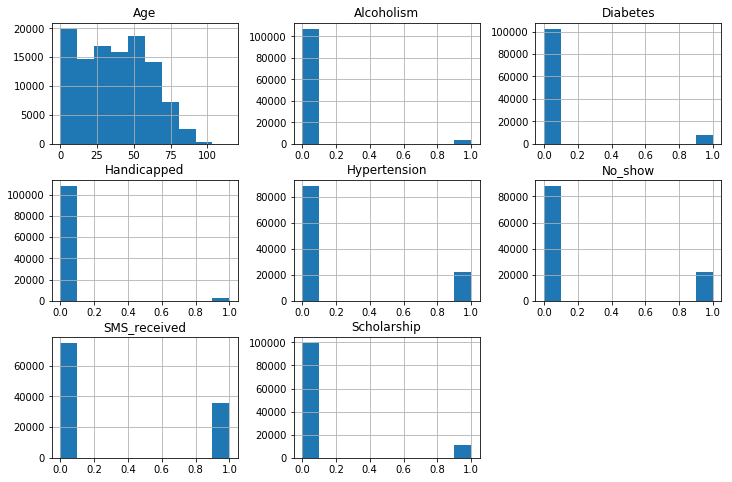

In [49]:
# Exploring Variables by histogram
df.hist(figsize=(12,8));

### - Attended to Missed Appointment Patients:

> Attended to missed appointment Patients ratio is 3.95; 

`Almost 1 in 4 Patient missed their medical Appointment`

In [50]:
# Attended to Missed Counts
df.No_show.value_counts()

0    88207
1    22319
Name: No_show, dtype: int64

Attended to missed appointment Patients ratio is 3.95


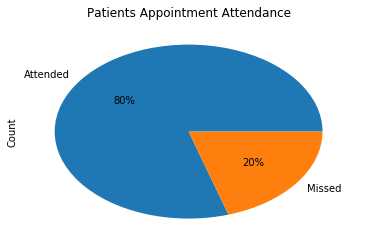

In [51]:
attended_to_missed_ratio = round(attended_pts.No_show.count()/missed_pts.No_show.count(),2)
print('Attended to missed appointment Patients ratio is',attended_to_missed_ratio)
df['No_show'].value_counts().plot(kind='pie',labels=["Attended","Missed"],   autopct='%1.0f%%')
plt.ylabel("Count")
plt.title("Patients Appointment Attendance");

### - Female to Male ratio:
> Female to Male ratio is 1.9; 

`Females are almost double men in the dataset representing 65% of total patients`.

In [52]:
# Female to Male Counts
df.Gender.value_counts()

F    71839
M    38687
Name: Gender, dtype: int64

Female to Male ratio is 1.9


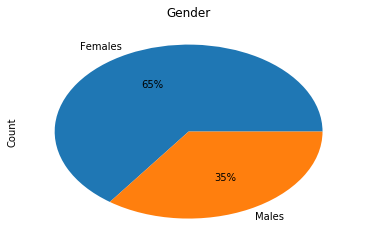

In [53]:
# Showing the Female to Male ratio% in the dataset
df.Gender.value_counts().plot(kind="pie",labels=["Females","Males"],   autopct='%1.0f%%')
plt.ylabel("Count")
plt.title("Gender");
print('Female to Male ratio is', round((df.Gender == 'F').sum()/(df.Gender == 'M').sum(),1))

### - Received to Not Received SMS Patients:
> Received to Not Received SMS Patients is 0.47;

`Almost 70% of patients didn't receive sms`.

In [54]:
# Received to Not Received Counts
df.SMS_received.value_counts()

0    75044
1    35482
Name: SMS_received, dtype: int64

Received to Not Received SMS Patients is 0.47


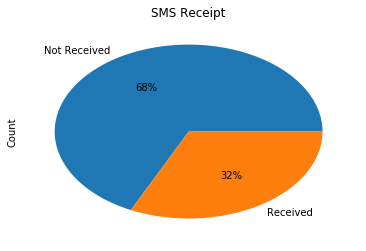

In [55]:
# Showing the Female to Male ratio% in the dataset
print('Received to Not Received SMS Patients is', round((df.SMS_received == 1).sum()/(df.SMS_received == 0).sum(),2))
df.SMS_received.value_counts().plot(kind="pie",labels=["Not Received","Received"],   autopct='%1.0f%%')
plt.ylabel("Count")
plt.title("SMS Receipt");

### - Addressing No_shows incidences across Variables:

> Addressing % Attended and Missed Appointment of each Variable and in each subgroup of each variable; should guide us spotting correlations with No_shows incidences, in order to answer the Research Quesitons

#### - Gender

Percentage of Females of Total Patients is
 64.997376183
Percentage of Males of Total Patients is
 35.0
Percentage of Female Patients who missed their appointment to total Female Patients is
 20.31
Percentage of Male Patients who missed their appointment to total Male Patients is
 19.97

 Gender  No_show
F       0          57245
        1          14594
M       0          30962
        1           7725
Name: No_show, dtype: int64


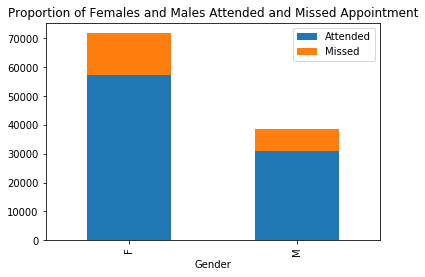

In [56]:
# Calculating % across Females and Males who attended and Missed their appointments
# Assigning a mask
gender_stacked = df.groupby('Gender')['No_show'].value_counts()
gender_stacked.unstack().plot(kind="bar",stacked=True)
# Plotting the Stacked bar plot
plt.legend(['Attended','Missed'])
plt.title('Proportion of Females and Males Attended and Missed Appointment');
# Running Calculations
print('Percentage of Females of Total Patients is\n',(gender_stacked.F.sum()/gender_stacked.sum())*100)
print('Percentage of Males of Total Patients is\n',round((gender_stacked.M.sum()/gender_stacked.sum())*100,2))
print('Percentage of Female Patients who missed their appointment to total Female Patients is\n',round((gender_stacked.F[1]/gender_stacked.F.sum())*100,2))
print('Percentage of Male Patients who missed their appointment to total Male Patients is\n',round((gender_stacked.M[1]/(gender_stacked.M.sum()))*100,2))
# Showing Data values of Gender vs No_show
print('\n',gender_stacked)

Slight differnce between missed appiintments % in Female and Male Patients

> #### `Creating a Custom Function to Automate the further Analysis`

In [57]:
# Defining a custom function to automate the analysis of other variables:
def calculate_n_plot(col_1,col_2,ser_1,ser_2):
    df_gb = df.groupby(col_1)[col_2].value_counts()
    df_gb.unstack().plot(kind="bar",stacked=True).set_xticklabels([ser_2, ser_1])
    plt.legend(['Attended','Missed'])
    print('Percentage of', ser_1, 'Patients to total Patients is\n',round((df_gb[1].sum()/len(df[col_1]))*100,2))
    print('Percentage of', ser_1, 'Patients who missed their appointment to total',ser_1,'Patients is\n',round((df_gb[1][1]/(df_gb[1][0]+df_gb[1][1]))*100,2))
    print('Percentage of', ser_2, 'Patients who missed their appointment to total',ser_2,'Patients is\n',round((df_gb[0][1]/(df_gb[0][0]+df_gb[0][1]))*100,2))
    print('\n',df_gb);

#### - Hypertension

Percentage of Hypertensive Patients to total Patients is
 19.72
Percentage of Hypertensive Patients who missed their appointment to total Hypertensive Patients is
 17.3
Percentage of Non_Hypertensive Patients who missed their appointment to total Non_Hypertensive Patients is
 20.9

 Hypertension  No_show
0             0          70178
              1          18547
1             0          18029
              1           3772
Name: No_show, dtype: int64


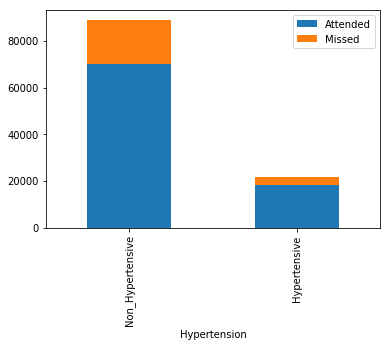

In [58]:
# Running the Custom fucniton with Hypertension variables
calculate_n_plot('Hypertension','No_show','Hypertensive','Non_Hypertensive');

Slight differnce between missed appiintments % in Hypertensive Patients and non- hypertensive patients.

#### - Diabetes

Percentage of Diabetic Patients to total Patients is
 7.19
Percentage of Diabetic Patients who missed their appointment to total Diabetic Patients is
 18.0
Percentage of Non_Diabetic Patients who missed their appointment to total Non_Diabetic Patients is
 20.36

 Diabetes  No_show
0         0          81694
          1          20889
1         0           6513
          1           1430
Name: No_show, dtype: int64


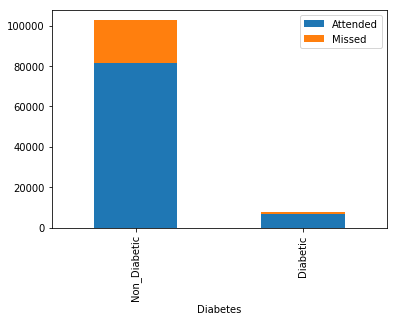

In [59]:
calculate_n_plot('Diabetes','No_show','Diabetic',"Non_Diabetic");

Slight differnce between missed appiintments % in Diabetic and non- diabetic patients

#### - Scholarship

Percentage of With_scholarship Patients to total Patients is
 9.83
Percentage of With_scholarship Patients who missed their appointment to total With_scholarship Patients is
 23.74
Percentage of Without_scholarship Patients who missed their appointment to total Without_scholarship Patients is
 19.81

 Scholarship  No_show
0            0          79924
             1          19741
1            0           8283
             1           2578
Name: No_show, dtype: int64


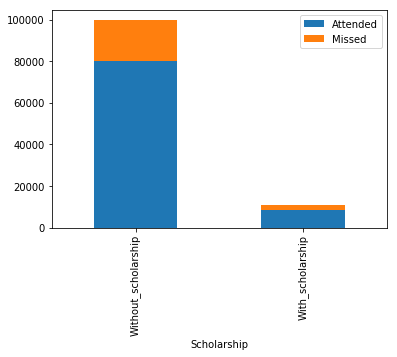

In [60]:
calculate_n_plot('Scholarship','No_show','With_scholarship',"Without_scholarship");

Patients with scholarship seemed to miss their medical appointment than who don't.

#### - Alcoholism

Percentage of Alcoholic Patients to total Patients is
 3.04
Percentage of Alcoholic Patients who missed their appointment to total Alcoholic Patients is
 20.15
Percentage of Non_Alcoholic Patients who missed their appointment to total Non_Alcoholic Patients is
 20.19

 Alcoholism  No_show
0           0          85524
            1          21642
1           0           2683
            1            677
Name: No_show, dtype: int64


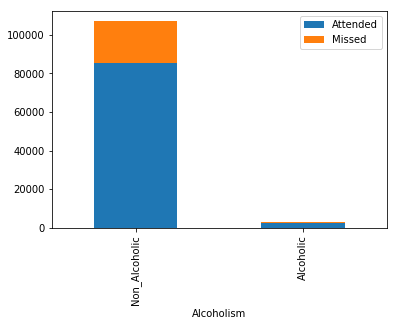

In [61]:
calculate_n_plot('Alcoholism','No_show','Alcoholic',"Non_Alcoholic");

Almost now diffrence between missed appointment rates among Alcoholic and non-alcoholic Patients.

#### - Handicapped Patients

Percentage of Handicapped Patients to total Patients is
 2.03
Percentage of Handicapped Patients who missed their appointment to total Handicapped Patients is
 18.16
Percentage of Not_Handicapped Patients who missed their appointment to total Not_Handicapped Patients is
 20.24

 Handicapped  No_show
0            0          86373
             1          21912
1            0           1834
             1            407
Name: No_show, dtype: int64


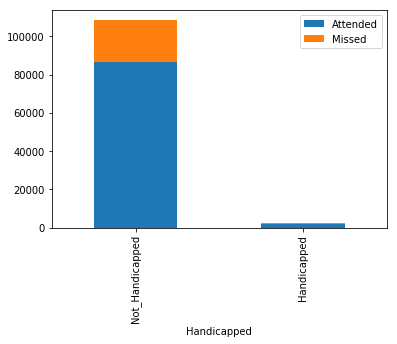

In [62]:
calculate_n_plot('Handicapped','No_show','Handicapped',"Not_Handicapped");

Ironically, Handicapped Patients has slighlty fewer missed appointments rate than normal patients.

#### - SMS message Receipt

Percentage of Received_SMS Patients to total Patients is
 32.1
Percentage of Received_SMS Patients who missed their appointment to total Received_SMS Patients is
 27.57
Percentage of Didn't_Receive_SMS Patients who missed their appointment to total Didn't_Receive_SMS Patients is
 16.7

 SMS_received  No_show
0             0          62509
              1          12535
1             0          25698
              1           9784
Name: No_show, dtype: int64


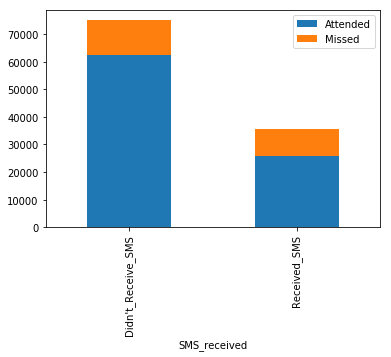

In [63]:
calculate_n_plot('SMS_received','No_show','Received_SMS',"Didn't_Receive_SMS");

Since a higher % missed their appointment in the Patients who received SMS group than the patient who didn't received the SMS, so a 
`negative correlation may be noticed here between receivng sms and missing the medical appointments`
and will be invistigated more in the next part

### B) Studying the Correlations between dependent Variable `No_show` and independent variables `Age` and `SMS_received`

## Research Questions:

Before we answer Research questions we are going to study correlations in depth

### - Addressing Correlations

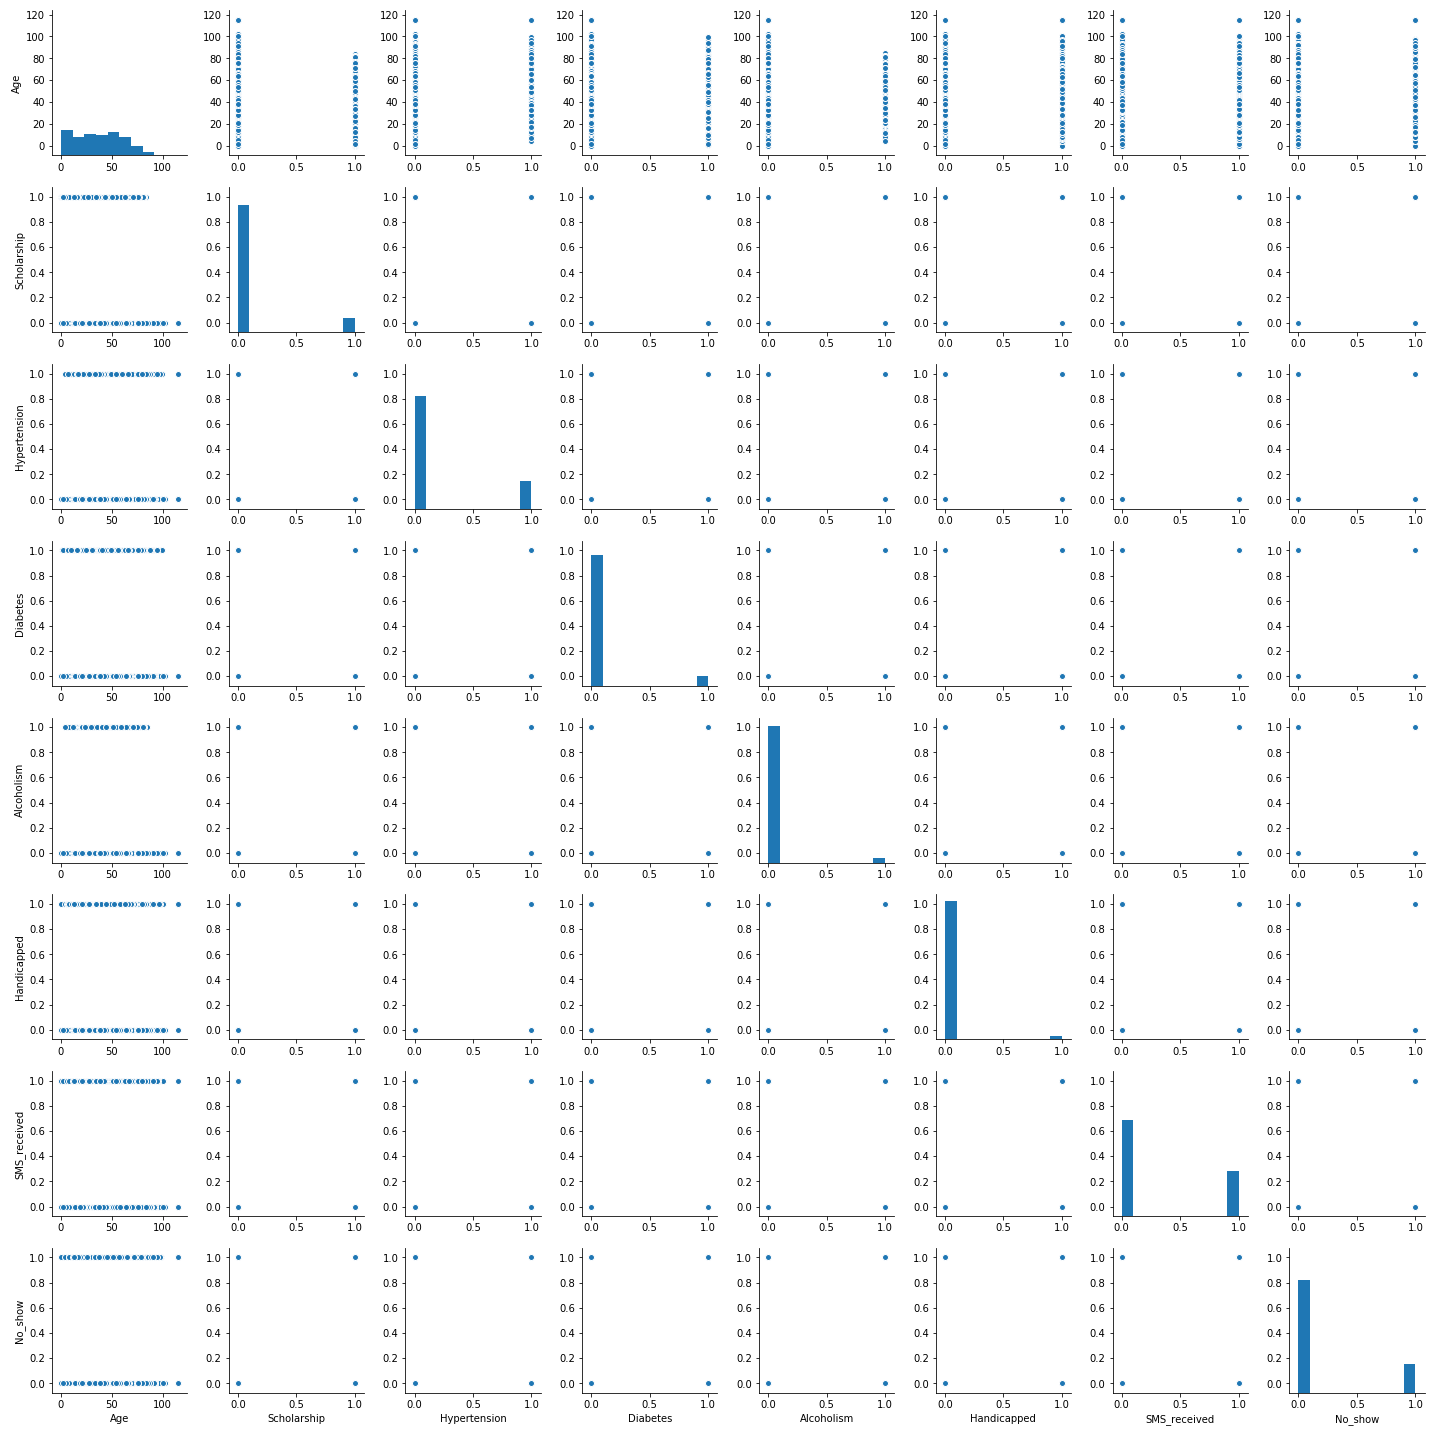

In [64]:
# Addressing Correlation by plotting pairplot
sns.pairplot(df);

Scince most of variables are dicotomous in nature, so it hinders spotting of correlation in pairplot graph, so we go for the `correlation heatmap`

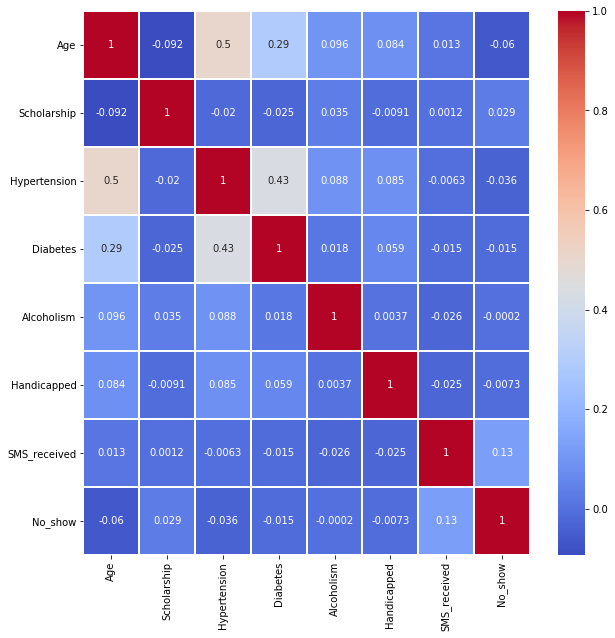

In [65]:
# Addressing Correlation on correlation heatmap
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, linewidths=1,cmap='coolwarm');

The correlation heatmap shows moderate-high negative correlation with Age and weak negative correlation with receiving sms message.

> #### Now we are ready to dig deep into research questions and answering it effectively.


### Q 1:  Is there is a correlation between No-shows incidences and Age ?

 Top 15 Ages in the dataset;representing  24.0 % of entire dataset
 Ages: [0, 1, 52, 49, 53, 56, 38, 59, 2, 50, 57, 36, 51, 19, 39]


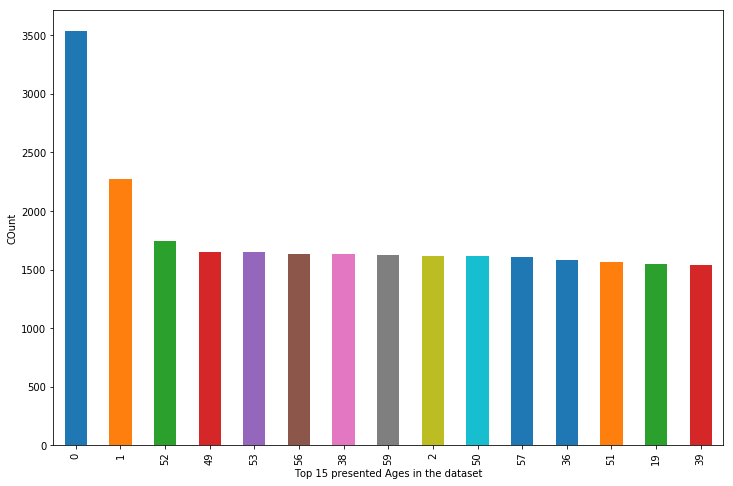

In [66]:
# Showing the Top 15 presented Ages in the dataset
print(' Top 15 Ages in the dataset;representing ',round(df.Age.value_counts().sort_values(ascending=False)[:15].sum()/df.Age.value_counts().sum(),2)*100,"% of entire dataset")
print(' Ages:',df.Age.value_counts().sort_values(ascending=False)[:15].index.values.tolist())
df.Age.value_counts().sort_values(ascending=False)[:15].plot(kind='bar', figsize=(12,8));
plt.ylabel('COunt')
plt.xlabel("Top 15 presented Ages in the dataset");

 Top 10 Ages in missed appointment patients,representing  26.0 % of Total missed appointments patients.
Ages: [0, 1, 17, 19, 30, 9, 20, 21, 16, 25, 22, 18, 33, 36, 23]


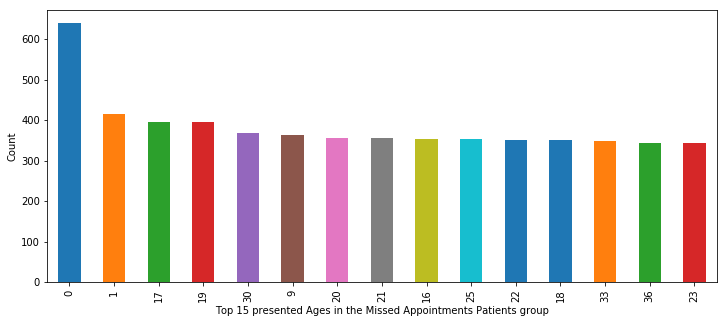

In [67]:
# Showing the Top 15 presented Ages in the missed appointment patients
print(' Top 10 Ages in missed appointment patients,representing ',round(missed_pts.Age.value_counts().sort_values(ascending=False)[:15].sum()/missed_pts.Age.value_counts().sum(),2)*100,"% of Total missed appointments patients.")
print('Ages:',missed_pts.Age.value_counts().sort_values(ascending=False)[:15].index.values.tolist())
missed_pts.Age.value_counts().sort_values(ascending=False)[:15].plot(kind='bar', figsize=(12,5));
plt.ylabel('Count')
plt.xlabel("Top 15 presented Ages in the Missed Appointments Patients group");

> * We noticed here that the top 15 represented Ages in Total dataset Patients differs significantly than the top 15 ages represented in the No_show patient group.

In [68]:
# Calculating mean of Age across Attended Missed and Total Patients
attended_pts.Age.mean(), missed_pts.Age.mean(), df.Age.mean()

(37.790504154999034, 34.317666562121957, 37.089218826339504)

> * Mean Age of No_show Patient siginifcantly differs than attended_pts group and the Total patients mean.

> * These findings would suggest that the increase in No_shows is not entirely related to sample size(records counts per Patient Age), and could be correlated with other factors such as Age, as we will study more now.

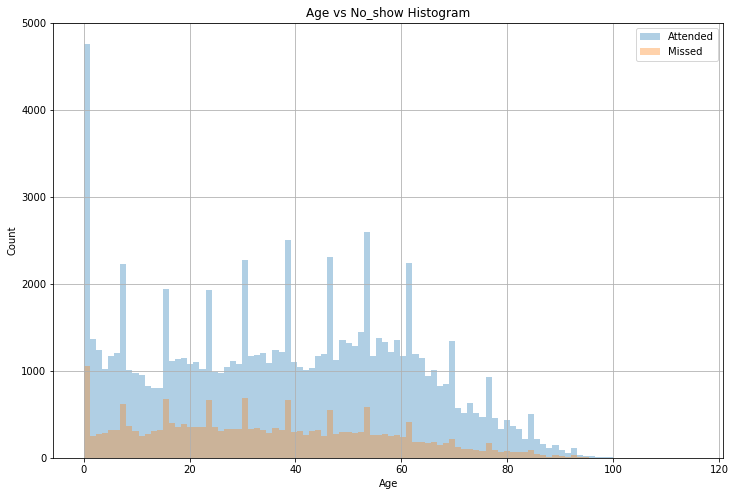

In [69]:
# Checking correlation between age and no_show by plotting both histogram for attended and missed patients segmented by Age
attended_pts.Age.hist(alpha=0.35, bins=100,label="Attended", figsize=(12,8))
missed_pts.Age.hist(alpha=0.35, bins=100,label="Missed", figsize=(12,8))
plt.legend();
plt.title("Age vs No_show Histogram")
plt.xlabel("Age")
plt.ylabel("Count");

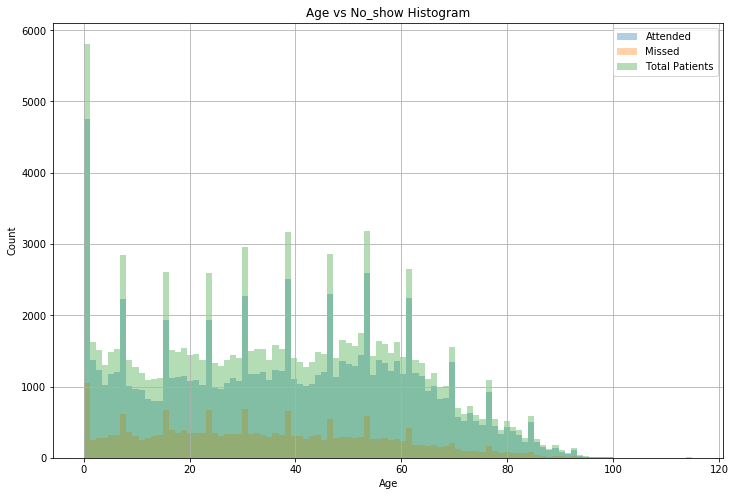

In [70]:
# Checking correlation between age and no_show by plotting both histogram for attended and missed patients segmented by Age
attended_pts.Age.hist(alpha=0.35, bins=100,label="Attended", figsize=(12,8))
missed_pts.Age.hist(alpha=0.35, bins=100,label="Missed", figsize=(12,8))
df.Age.hist(alpha=0.35, bins=100,label="Total Patients", figsize=(12,8))
plt.legend();
plt.title("Age vs No_show Histogram")
plt.xlabel("Age")
plt.ylabel("Count");

In [71]:
df.corr().style.background_gradient(cmap='coolwarm')

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicapped,SMS_received,No_show
Age,1,-0.0924633,0.504586,0.292391,0.0958098,0.0837416,0.0126333,-0.0603268
Scholarship,-0.0924633,1,-0.0197303,-0.0248944,0.035022,-0.00910378,0.00119196,0.0291336
Hypertension,0.504586,-0.0197303,1,0.433085,0.0879701,0.0848511,-0.00626997,-0.0357035
Diabetes,0.292391,-0.0248944,0.433085,1,0.0184731,0.0591445,-0.0145518,-0.0151812
Alcoholism,0.0958098,0.035022,0.0879701,0.0184731,1,0.00369172,-0.0261485,-0.00019685
Handicapped,0.0837416,-0.00910378,0.0848511,0.0591445,0.00369172,1,-0.0252206,-0.00728141
SMS_received,0.0126333,0.00119196,-0.00626997,-0.0145518,-0.0261485,-0.0252206,1,0.126428
No_show,-0.0603268,0.0291336,-0.0357035,-0.0151812,-0.00019685,-0.00728141,0.126428,1


From the Age vs No_show Histogram, difference in mean ages, the heatmap; we can conclude a significant negative correlation between age and No_shows incidences.

The negative correlation can be spotted clearly at the histogram starting from Ages from 17 till 100+; we can see that as the age increases; no. of No_shows decreases; indicating that No_shows incidences in Young Adults throughout Geriatric patients is inversly protional to Age; 
> ### `The higher the age; the lesser the missed medical appointments/No_shows`.

### Q 2: Is there a correlation between No-Shows incidences  and receiveing SMS message?

Received to Not Received SMS Patients is 0.47


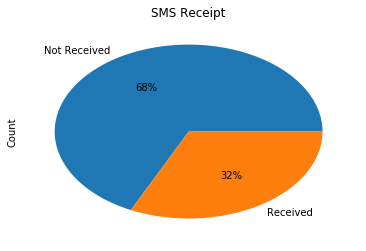

In [72]:
# Showing the Female to Male ratio% in the dataset
print('Received to Not Received SMS Patients is', round((df.SMS_received == 1).sum()/(df.SMS_received == 0).sum(),2))
df.SMS_received.value_counts().plot(kind="pie",labels=["Not Received","Received"],   autopct='%1.0f%%')
plt.ylabel("Count")
plt.title("SMS Receipt");

Percentage of Received_SMS Patients to total Patients is
 32.1
Percentage of Received_SMS Patients who missed their appointment to total Received_SMS Patients is
 27.57
Percentage of Didn't_Receive_SMS Patients who missed their appointment to total Didn't_Receive_SMS Patients is
 16.7

 SMS_received  No_show
0             0          62509
              1          12535
1             0          25698
              1           9784
Name: No_show, dtype: int64


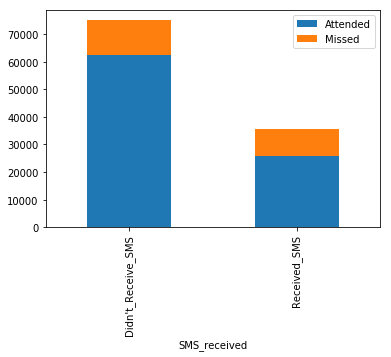

In [73]:
calculate_n_plot('SMS_received','No_show','Received_SMS',"Didn't_Receive_SMS");

##### Figures:
- Percentage of Received_SMS Patients to total Patients is
 32.1
 
- Percentage of Received_SMS Patients who missed their appointment to total Received_SMS Patients is
 27.57

- Percentage of Didn't_Receive_SMS Patients who missed their appointment to total Didn't_Receive_SMS Patients is
 16.7

From the exploration part, correlation heatmap, and the above results; we can summarize the following:
- About two thirds of the patients didn't recieve SMS.

- Despite the fact that the correlation heatmap showed a weak negative correlation between receiving sms message and missing medical appointments; a much lower % of Patient who didn't receive the SMS missed their appointment, when compared to patients who received sms message; indicating a controversy, but indeed ...


> ### ` Receving sms messge didn't significantly decrease missed apointments, it may had worsen it.`

and futher invistigation could resolve this controversy.


<a id='conclusions'></a>
## Conclusions

> - Through all the perceiding results, findings and visulaizations; we've seen that Age was significantly and negatively correlated with No_shows incidences. and we could conclude that, `as the age increases; patients get more commitment to their medical appointments`.

> - Secondly,we've noticed a weak negative correlation between receiving sms and missing the medical appointments, so a further analysis could be done, trying to invistigate the context of sending and receiveing these sms and the leading time between sending them and the appointment dates, if this data is avaioable in the first place.

> ### In conclusion, Age can be used in the prediction of No_shows incidences, while "sending a reminding sms" has low and negative impact on patients' commitment to their medical appintments. 


## Limitations:
- We didn't invistigate 3 variables; ScheduledDay, AppointmentDay and Neighbourhood
- We didn't categoried age into age groups and study the in-between variability and correlation with dependent variable.

## Future Invitigation
- Studying the correlation with "Leading time" (time from scheduling day till appointment day; would be valuable in concluding what factors affect prediction of No_show incidences.

In [75]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0